In [46]:
! pip install h2o
#Installing H20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
#Importing h2o and automl modules.
import h2o
from h2o.automl import H2OAutoML
import os

In [48]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 40 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_0spvtl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.958 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [49]:
data = h2o.import_file("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
df_train,df_test,df_valid = data.split_frame(ratios=[.7, .15])
#creating training , testing and validating datasets with 70,15,15 ratio.

In [51]:
y = "y"
x = data.columns
x.remove(y)
#Differntiating X and Y

In [52]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)
#Applying automl it will run max of 10 models and we won't be excluding any model.

In [53]:
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)
#Training the automl model with train dataset, and we are using validation dataset for validating all the models involved

AutoML progress: |
21:42:55.665: Project: AutoML_6_20221217_214255
21:42:55.665: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:42:55.665: Setting stopping tolerance adaptively based on the training frame: 0.0058847969630011305
21:42:55.665: Build control seed: 10
21:42:55.665: training frame: Frame key: AutoML_6_20221217_214255_training_py_316_sid_a5b7    cols: 21    rows: 28876  chunks: 8    size: 585225  checksum: 6254408419842905944
21:42:55.665: validation frame: Frame key: py_318_sid_a5b7    cols: 21    rows: 6190  chunks: 8    size: 171049  checksum: -6299356701791241872
21:42:55.666: leaderboard frame: Frame key: py_318_sid_a5b7    cols: 21    rows: 6190  chunks: 8    size: 171049  checksum: -6299356701791241872
21:42:55.666: blending frame: NULL
21:42:55.666: response column: y
21:42:55.666: fold column: null
21:42:55.666: weights column: null
21:42:55.666: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_6_20221217_214255


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    70                 70                          101846                 12           15           14.9571       32            173           110.886

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04077288977970599
RMSE: 0.20192297982078708
LogLoss: 0.13106783557618923
Mean Per-Class Error: 0.10782401817564416
AUC: 0.9758258685321555
AUCPR: 0.8312396817765514
Gini: 0.9516517370643109

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37903938549962773
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     24449  1155   0.0451   (1155.0/25604.0)
yes    558    2714   0.1705   (558.0/3272.0)
Total  25007  3869   0.0593   (1713.0/28876.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.379039     0.760118  198
max f2                       0.21763      0.830531  261
max f0point5                 0.564055     0.773151  127
max accuracy                 0.459331     0.943863  167
max precision                0.95632      1         0
max recall                   0.0128179    1         374
max specificity              0.95632      1         0
max absolute_mcc             0.379039     0.729863  198
max min_per_class_accuracy   0.239075     0.919505  251
max mean_per_class_accuracy  0.155114     0.927127  289
max tns                      0.95632      25604     0
max fns                      0.95632      3268      0
max fps                      0.000568437  25604     399
max tps                      0.0128179    3272      374
max tnr                      0.95632      1         0
max fnr                      0.95632      0.998778  0
max fpr                      0.000568437  1         399
max tpr                      0.0128179    1         374

Gains/Lift Table: Avg response rate: 11.33 %, avg score: 11.36 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100083                   0.868661           8.6725     8.6725             0.982699         0.902227     0.982699                    0.902227            0.0867971       0.0867971                  767.25    767.25             0.0866018
2        0.0200166                   0.802299           8.36713    8.51981            0.948097         0.835774     0.965398                    0.869               0.0837408       0.170538                   736.713   751.981            0.169757
3        0.0300249                   0.754425           7.87854    8.30605            0.892734         0.779542     0.941176                    0.839181            0.0788509       0.249389                   687.854   730.605            0.247397
4        0.0400332                   0.708863           7.42048    8.08466            0.84083          0.730538     0.91609                     0.81202             0.0742665       0.323655                   642.048   708.466            0.319867
5        0.0500069                   0.670047           7.38496    7.94511            0.836806         0.687573

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_6_20221217_214255,0.950105,0.171038,0.676519,0.143482,0.234335,0.0549131,3001,0.015579,XGBoost
XGBoost_6_AutoML_7_20221217_215419,0.950105,0.171038,0.676519,0.143482,0.234335,0.0549131,2305,0.003484,XGBoost
GBM_5_AutoML_7_20221217_215419,0.949967,0.171572,0.663025,0.121628,0.235256,0.0553455,4257,0.041585,GBM
GBM_1_AutoML_6_20221217_214255,0.949967,0.171572,0.663025,0.121628,0.235256,0.0553455,4544,0.016694,GBM
GBM_2_AutoML_6_20221217_214255,0.948686,0.175432,0.655574,0.140162,0.237608,0.0564578,2117,0.009808,GBM
GBM_6_AutoML_7_20221217_215419,0.948686,0.175432,0.655574,0.140162,0.237608,0.0564578,2002,0.009769,GBM
GBM_8_AutoML_7_20221217_215419,0.947831,0.179486,0.647866,0.128514,0.239754,0.0574818,2679,0.041269,GBM
GBM_4_AutoML_6_20221217_214255,0.947831,0.179486,0.647866,0.128514,0.239754,0.0574818,3691,0.012193,GBM
GBM_7_AutoML_7_20221217_215419,0.946595,0.178642,0.653392,0.14726,0.239462,0.057342,2434,0.040026,GBM
GBM_3_AutoML_6_20221217_214255,0.946595,0.178642,0.653392,0.14726,0.239462,0.057342,2321,0.012311,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_7_20221217_215419

,no,yes,Error,Rate
no,4914.0,522.0,0.096,(522.0/5436.0)
yes,101.0,585.0,0.1472,(101.0/686.0)
Total,5015.0,1107.0,0.1018,(623.0/6122.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

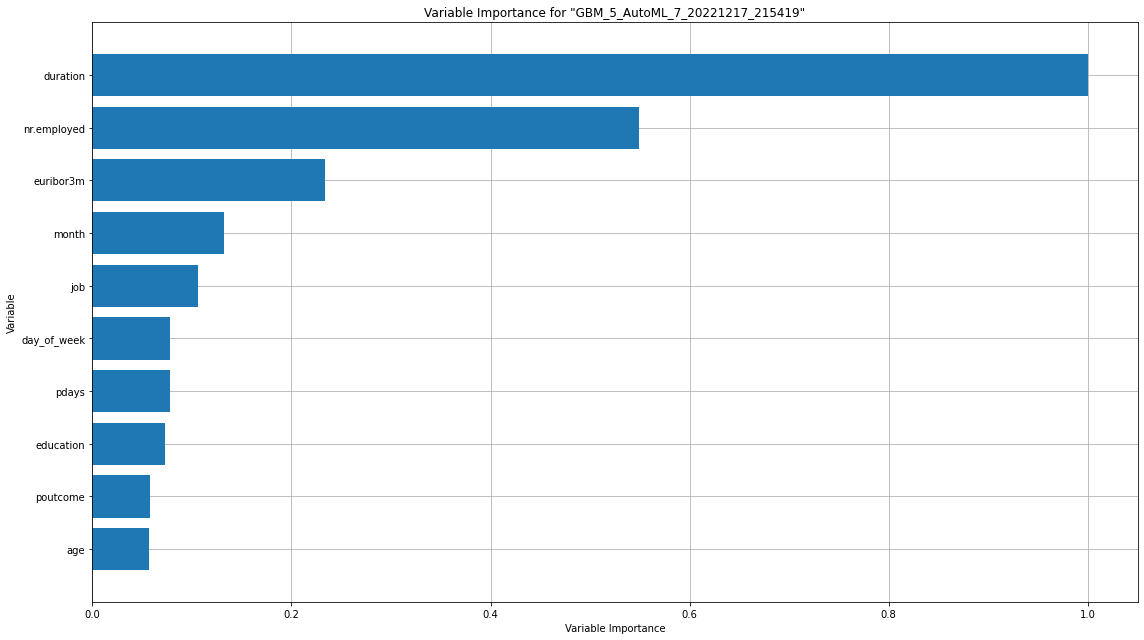

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

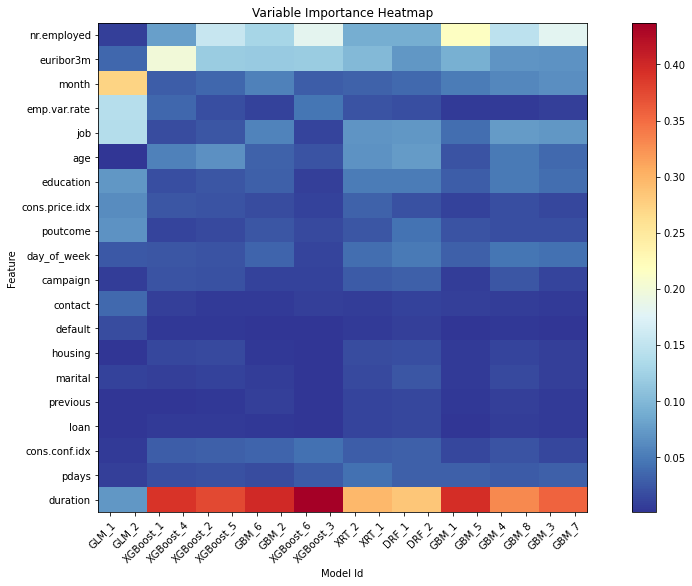

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

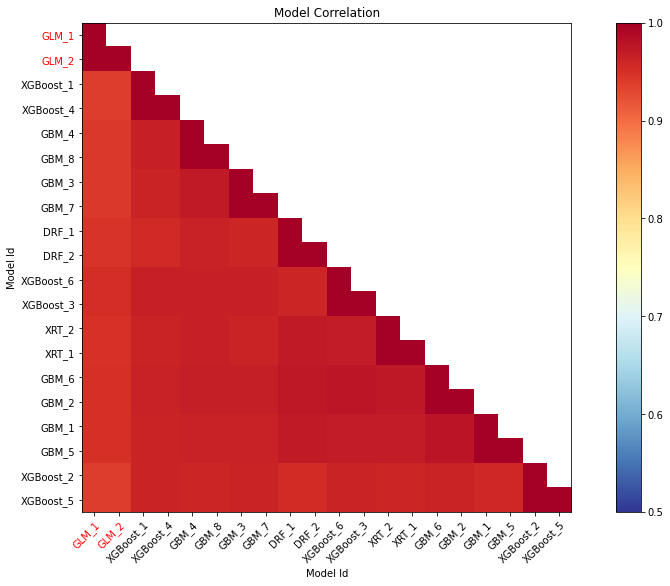

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

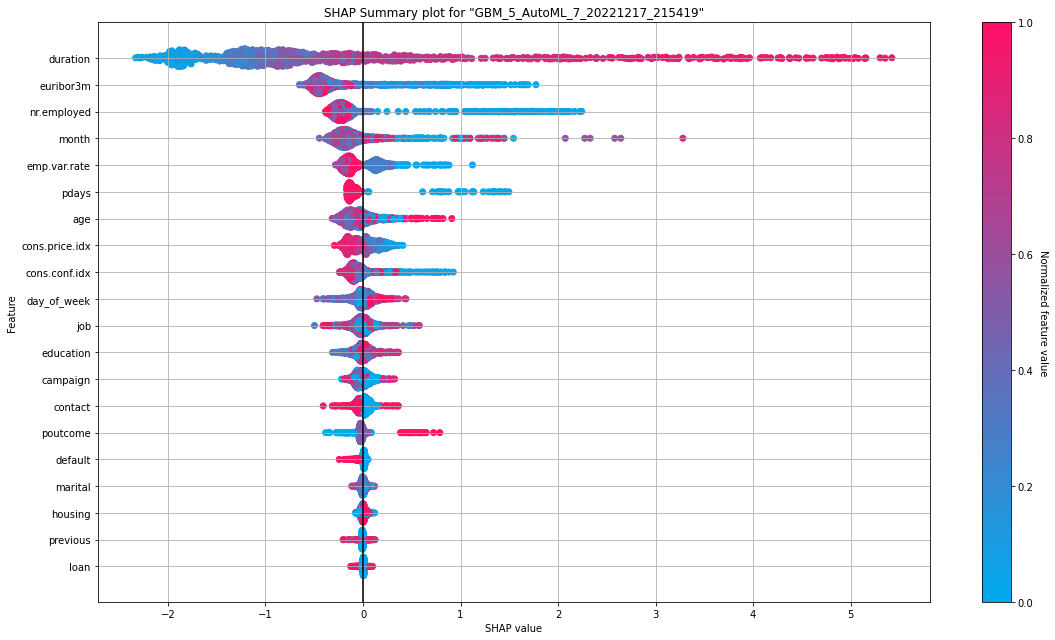

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

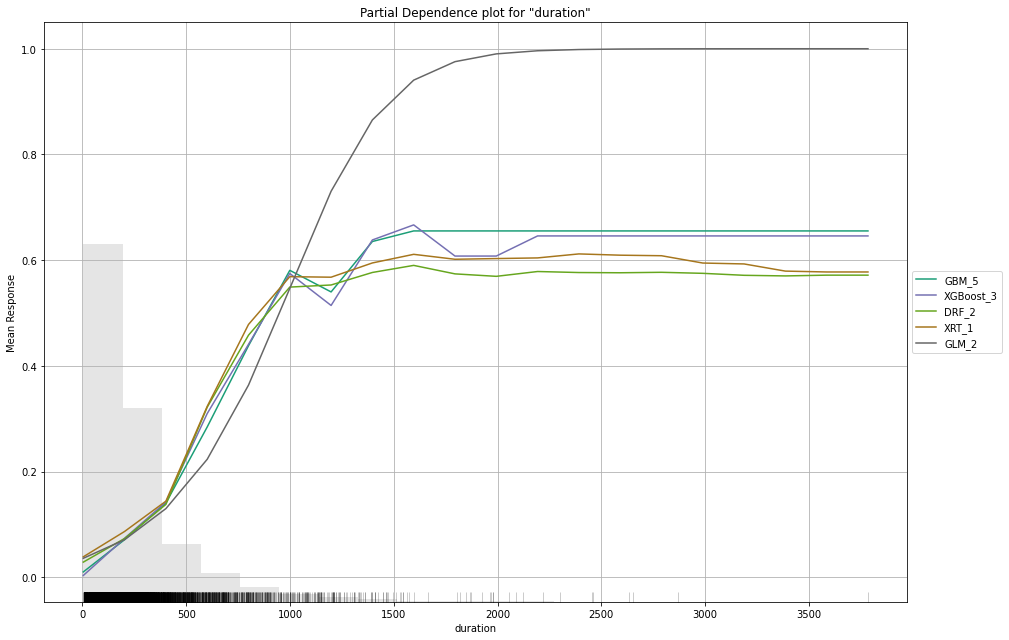

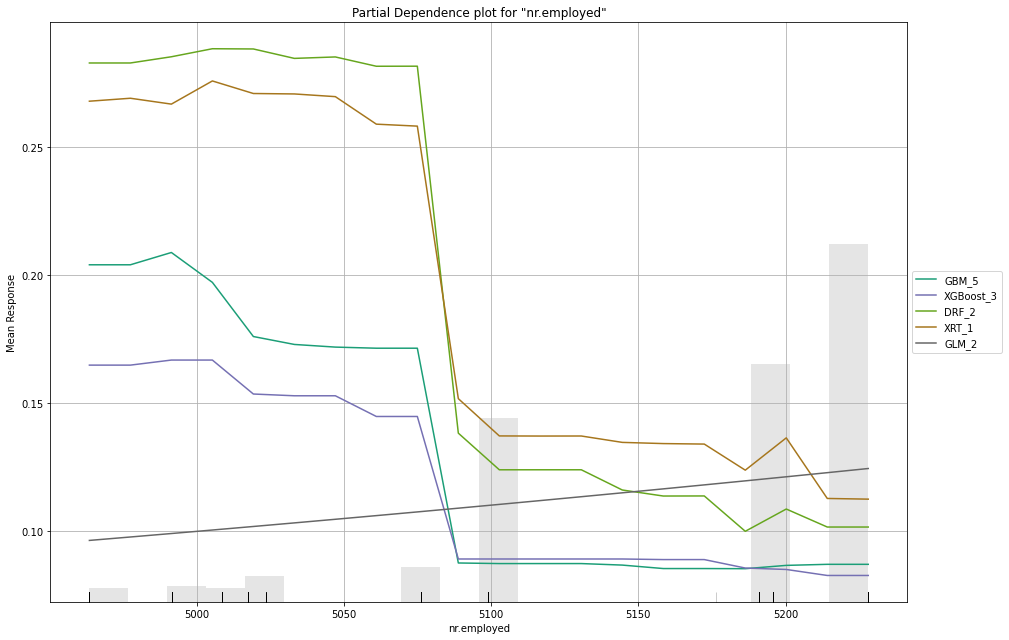

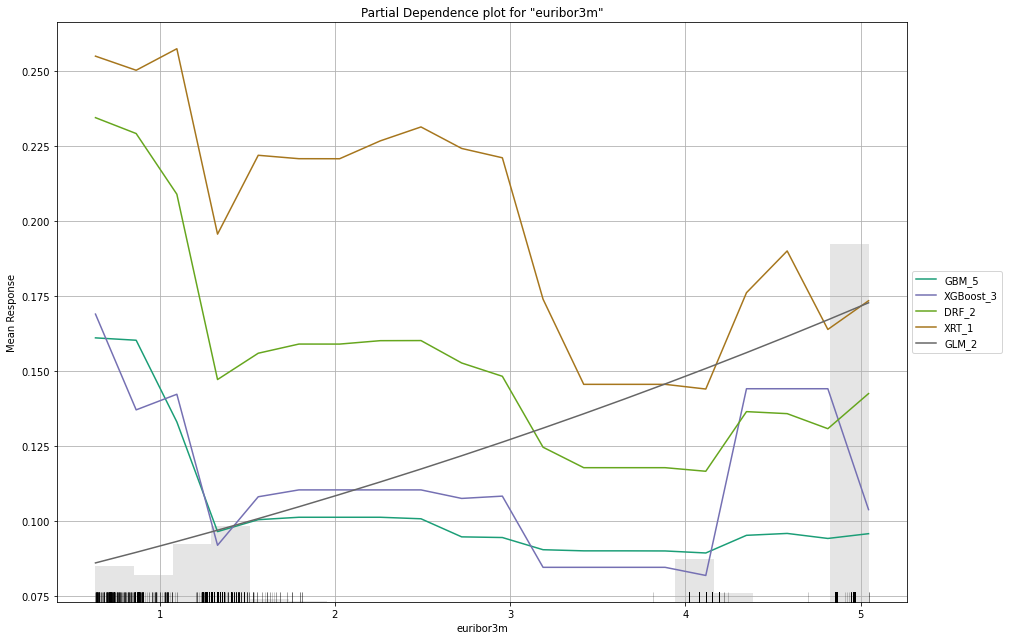

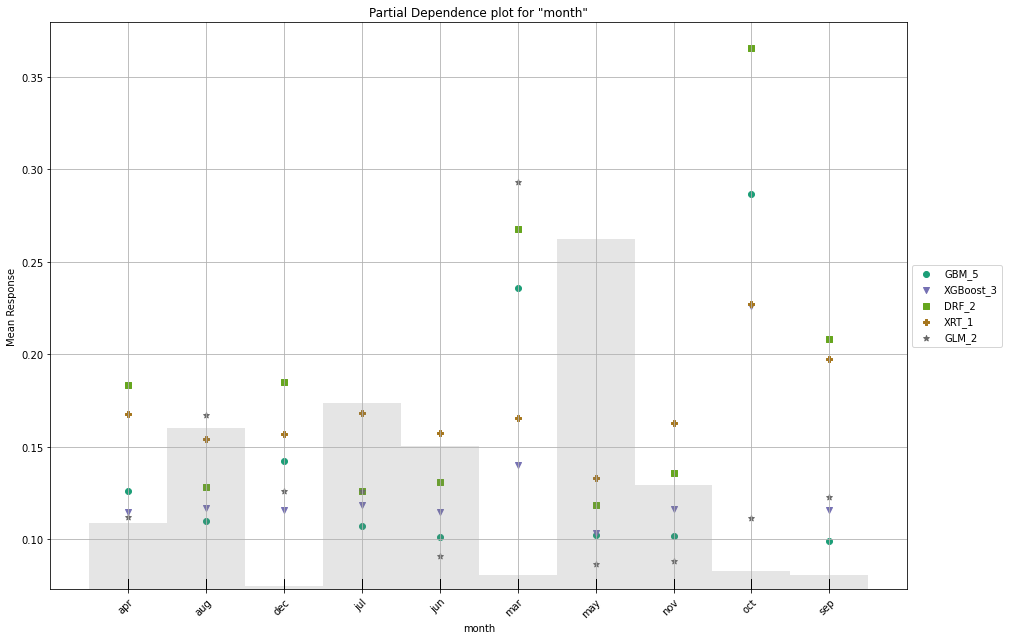

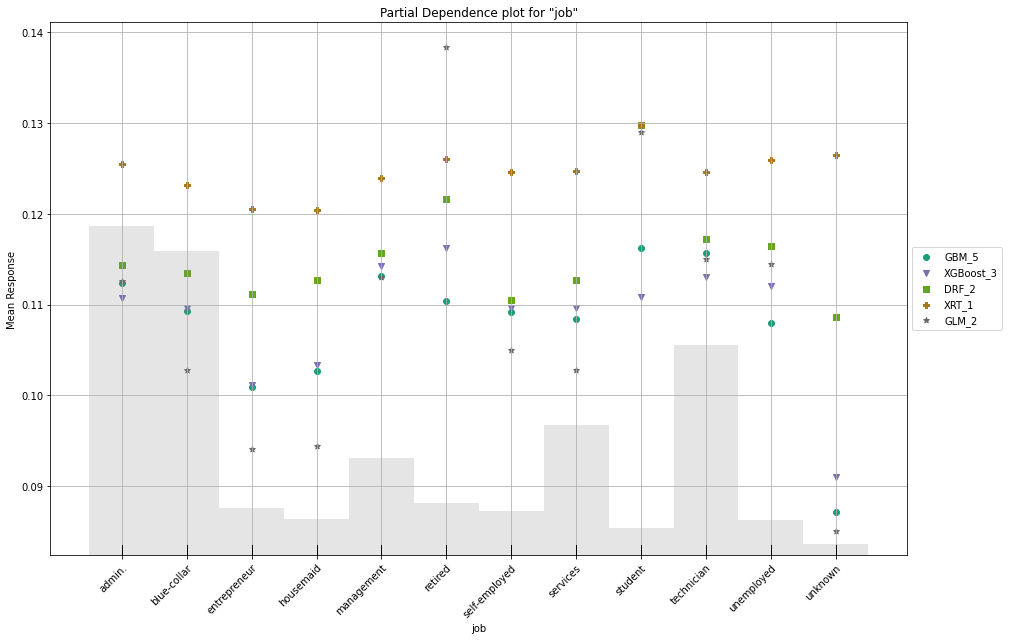

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_6_20221217_214255,0.950105,0.171038,0.676519,0.143482,0.234335,0.0549131,3001,0.015579,XGBoost
XGBoost_6_AutoML_7_20221217_215419,0.950105,0.171038,0.676519,0.143482,0.234335,0.0549131,2305,0.003484,XGBoost
GBM_5_AutoML_7_20221217_215419,0.949967,0.171572,0.663025,0.121628,0.235256,0.0553455,4257,0.041585,GBM
GBM_1_AutoML_6_20221217_214255,0.949967,0.171572,0.663025,0.121628,0.235256,0.0553455,4544,0.016694,GBM
GBM_2_AutoML_6_20221217_214255,0.948686,0.175432,0.655574,0.140162,0.237608,0.0564578,2117,0.009808,GBM
GBM_6_AutoML_7_20221217_215419,0.948686,0.175432,0.655574,0.140162,0.237608,0.0564578,2002,0.009769,GBM
GBM_8_AutoML_7_20221217_215419,0.947831,0.179486,0.647866,0.128514,0.239754,0.0574818,2679,0.041269,GBM
GBM_4_AutoML_6_20221217_214255,0.947831,0.179486,0.647866,0.128514,0.239754,0.0574818,3691,0.012193,GBM
GBM_7_AutoML_7_20221217_215419,0.946595,0.178642,0.653392,0.14726,0.239462,0.057342,2434,0.040026,GBM
GBM_3_AutoML_6_20221217_214255,0.946595,0.178642,0.653392,0.14726,0.239462,0.057342,2321,0.012311,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_7_20221217_215419

,no,yes,Error,Rate
no,4914.0,522.0,0.096,(522.0/5436.0)
yes,101.0,585.0,0.1472,(101.0/686.0)
Total,5015.0,1107.0,0.1018,(623.0/6122.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [87]:
aml.explain(df_test)

In [54]:
data2 = h2o.import_file("/content/drive/MyDrive/bank-cleaned.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [72]:
data_train,data_test,data_valid = data2.split_frame(ratios=[.7, .15])
#creating training , testing and validating datasets with 70,15,15 ratio.

In [75]:
y1 = "y"
x1 = data2.columns
x1.remove(y1)
#Differntiating X and Y

In [76]:
aml2 = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)
#Applying automl it will run max of 10 models and we won't be excluding any model.

In [77]:
aml2.train(x = x1, y = y1, training_frame = data_train, validation_frame = data_valid)
#Training the automl model with train dataset, and we are using validation dataset for validating all the models involved

AutoML progress: |
22:01:38.985: Project: AutoML_8_20221217_220138
22:01:38.985: Cross-validation disabled by user: no fold column nor nfolds > 1.
22:01:38.985: Setting stopping tolerance adaptively based on the training frame: 0.005886835976597193
22:01:38.985: Build control seed: 10
22:01:38.986: training frame: Frame key: AutoML_8_20221217_220138_training_py_330_sid_a5b7    cols: 16    rows: 28856  chunks: 8    size: 488027  checksum: -1972928603208903912
22:01:38.986: validation frame: Frame key: py_332_sid_a5b7    cols: 16    rows: 6191  chunks: 8    size: 111163  checksum: -817339299947389392
22:01:38.986: leaderboard frame: Frame key: py_332_sid_a5b7    cols: 16    rows: 6191  chunks: 8    size: 111163  checksum: -817339299947389392
22:01:38.986: blending frame: NULL
22:01:38.986: response column: y
22:01:38.986: fold column: null
22:01:38.986: weights column: null
22:01:38.986: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,55.0,55.0,86968.0,15.0,15.0,15.0,50.0,171.0,120.65455
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-12-17 22:01:41,0.003 sec,0.0,0.3173231,0.2013879,0.1006939,0.3135063,0.1989801,0.0982862
,2022-12-17 22:01:41,0.203 sec,5.0,0.2704153,0.1675436,0.0731244,0.2686942,0.1661728,0.0721966
,2022-12-17 22:01:41,0.393 sec,10.0,0.2483591,0.1459297,0.0616823,0.2488913,0.1456694,0.0619469
,2022-12-17 22:01:41,0.613 sec,15.0,0.2376170,0.1311567,0.0564618,0.2403456,0.1319691,0.0577660
,2022-12-17 22:01:41,0.821 sec,20.0,0.2322585,0.1219471,0.0539440,0.2370728,0.1238361,0.0562035
,2022-12-17 22:01:42,1.033 sec,25.0,0.2293015,0.1162036,0.0525792,0.2352464,0.1186560,0.0553409
,2022-12-17 22:01:42,1.238 sec,30.0,0.2272524,0.1131661,0.0516437,0.2345814,0.1162431,0.0550284
,2022-12-17 22:01:42,1.451 sec,35.0,0.2254353,0.1108702,0.0508211,0.2343350,0.1146724,0.0549129


In [83]:
aml2.leader.model_performance(data_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.055567463372475395
RMSE: 0.23572751933636302
MAE: 0.11464222274456078
RMSLE: 0.16540673662365998
Mean Residual Deviance: 0.055567463372475395

Copyright
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.